<img src="kelly.png" alt="Kelly's message" align="right" style="width: 175px;"/>


## Kelly, our CTO, has sent you the following message:

Hello SA team, Please help me.  I have lost my pet photos.  I only have a few, but I really want them back.
They were in a folder but also in that folder are a ton of building images of our new construction project.
Jack in our file services team indicates that if you give him a  list (as in a python list) of images that might be my pets he can put the files in my homedir. Please Help!!!!!!!!!!!!

* The images that Kelly found are stored in an S3 bucket, s3://mads-cloud/pet/*  You will either need to copy the files locally to work on or use the S3 APIs to access the files.

### To get start on this project, click "Start Lab" in the top right corner of the screen. You can use the sample code below to get started.

In [1]:
# The labels you are looking for is NOT in this list:
building_labels = [
    'Lighting', 'Handrail', 'Intersection', 'Smoke', 'Car', 'Nature', 'Flare',
    'Office Building', 'Road', 'Nature', 'Tarmac', 'Metropolis', 'Building',
    'Landscape', 'Architecture', 'Flooring', 'Outdoors',
]

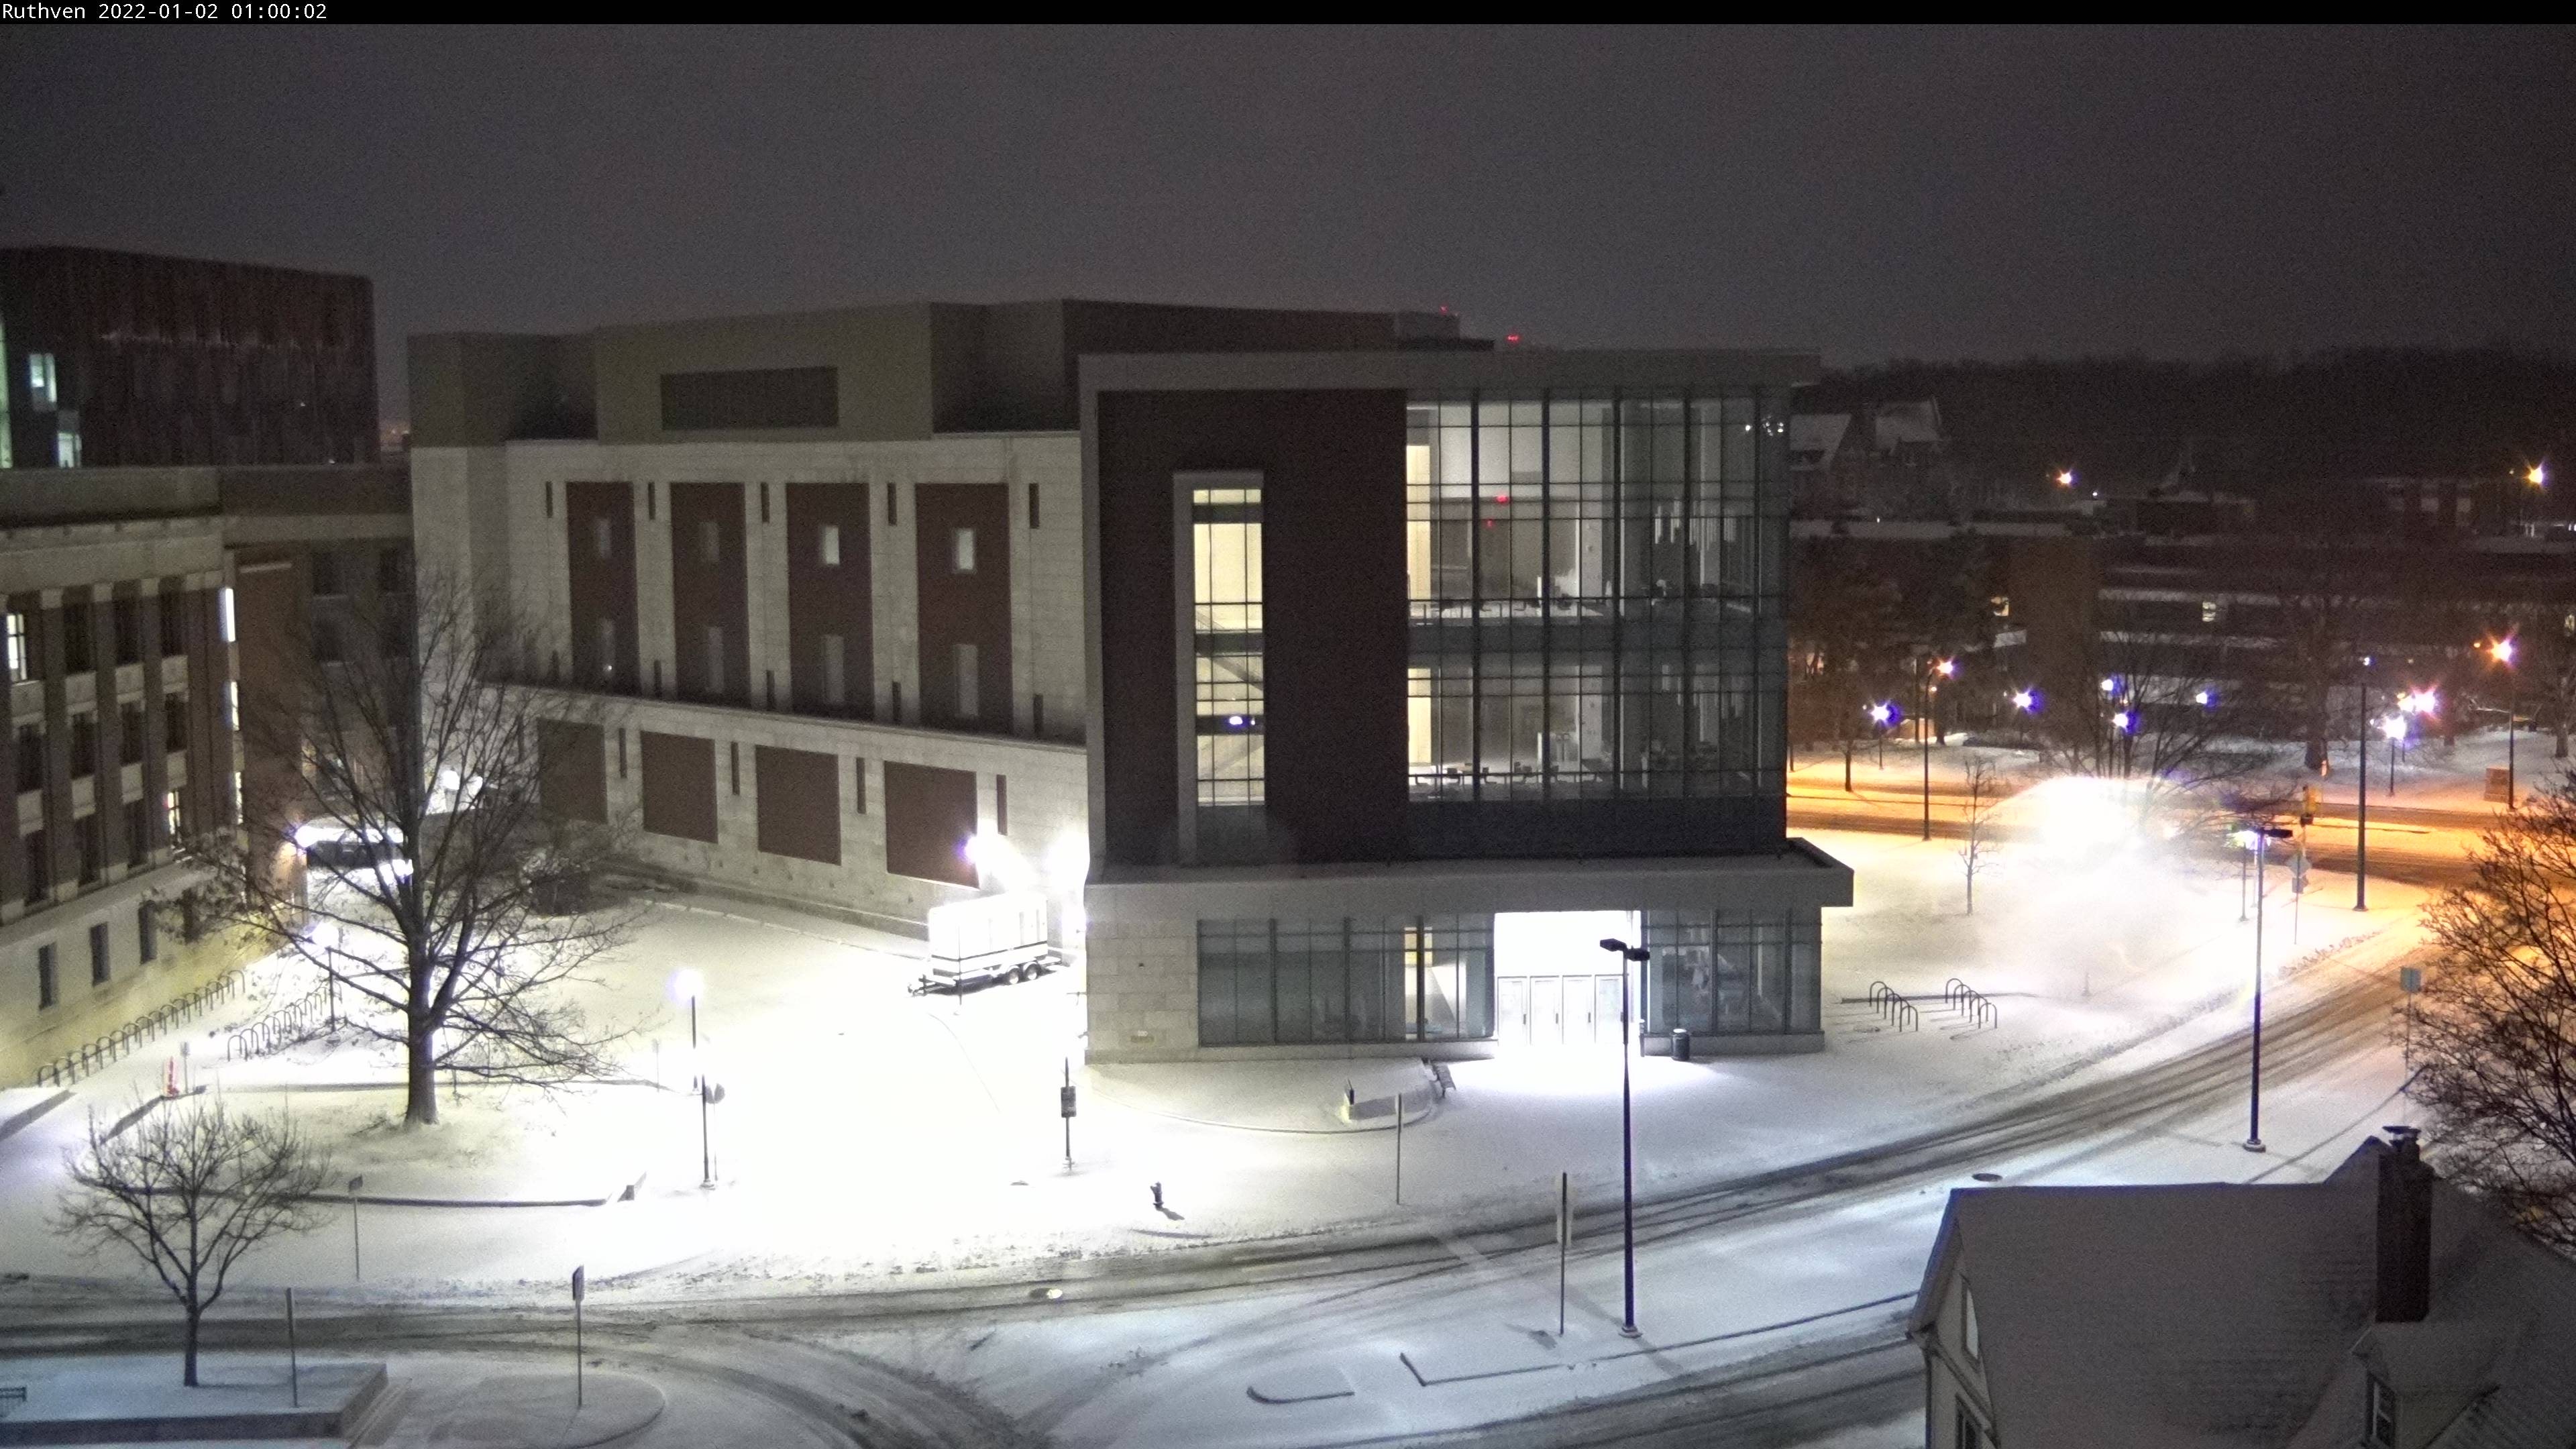

In [2]:
### Here is some sample code that shows how to loop through the objects from S3.
### It also displays the image. Note the "break" statement so that it only shows the first image.


import boto3
from IPython.display import display, Image

bucket = 'mads-cloud'
session = boto3.Session()
s3 = session.resource('s3')

### Here is an example call that lets you enumerate objects in S3.
### You may need to read about the S3 API to learn more.  
my_bucket = s3.Bucket(bucket)
for obj in my_bucket.objects.filter(Prefix="pet/"):
    if "jpg" in obj.key:
        display(Image(data=obj.get()['Body'].read(), width=200))
        break

In [3]:
### This example shows how to connected to the Rekognition service and list the labels is provides for a given image.

client = boto3.client('rekognition', region_name='us-east-1')
res = client.detect_labels(Image={'S3Object':{'Bucket':bucket,'Name':obj.key}},MaxLabels=3)

for i in res['Labels']:
    print(i['Name'])


City
Office Building
Street


You can use the examples above for inspiration, but you will need to use your Python skills to write it. It may be helpful to search the web for examples and discussion about using the AWS tools, but you should not need more than what is shown in the examples above.

In [4]:
# Your code should populate this list

answer = []
building_labels.append('Urban')

for obj in my_bucket.objects.filter(Prefix="pet/"):
    if "jpg" in obj.key:
        res = client.detect_labels(Image={'S3Object':{'Bucket':bucket, 'Name': obj.key}},MaxLabels=3)
        
        label_list = []
        for i in res['Labels']:
            label_list.append(i['Name'])
            
        building_labels_present = bool(set(label_list) & set(building_labels))
        if not building_labels_present:
            answer.append(obj.key)


In [13]:
answer = ['j4svnYcaTXC5cwuLMOHyQd.jpg', 'j4svnYcadsf4XC5cwuLMOHyQd.jpg', 'jWQvnYJTaCAcuLMsHyQf.jpg', 'kExuAQyaKduyYFdSiENo.jpg']

['pet/j4svnYcaTXC5cwuLMOHyQd.jpg',
 'pet/j4svnYcadsf4XC5cwuLMOHyQd.jpg',
 'pet/jWQvnYJTaCAcuLMsHyQf.jpg',
 'pet/kExuAQyaKduyYFdSiENo.jpg']

In [5]:
assert len(answer) == 4, "There are 4 pet pictures in this data set"

In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
